In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('5km-manzanas.csv')


In [7]:
import geopandas as gpd

manzanas = gpd.read_file('/Users/marielalvarez/Downloads/manzanas/INEGI_Manzanas_.shp')
manzanas.head()

CVEGEO CVE_ENT     NOM_ENT CVE_MUN                 NOM_MUN  \
0  1902600012703004      19  Nuevo León     026               Guadalupe   
1  1902600010482054      19  Nuevo León     026               Guadalupe   
2  1902600011993019      19  Nuevo León     026               Guadalupe   
3  1902600010815008      19  Nuevo León     026               Guadalupe   
4  1901900010331046      19  Nuevo León     019  San Pedro Garza García   

  CVE_LOC                 NOM_LOC CVE_AGEB CVE_MZA  POBTOT  ...  \
0    0001               Guadalupe     2703     004      71  ...   
1    0001               Guadalupe     0482     054      39  ...   
2    0001               Guadalupe     1993     019     142  ...   
3    0001               Guadalupe     0815     008     155  ...   
4    0001  San Pedro Garza García     0331     046     104  ...   

              ARBOLES_D        DRENAJEP_D        TRANSCOL_D  \
0       Alguna vialidad  Ninguna vialidad  Ninguna vialidad   
1       Alguna vialidad  Ninguna vialidad  Ninguna vialidad   
2       Alguna vialidad  Ninguna vialidad  Ninguna vialidad   
3       Alguna vialidad  Ninguna vialidad  Ninguna vialidad   
4  Todas las vialidades  Ninguna vialidad  Ninguna vialidad   

                        ACESOPER_D                       ACESOAUT_D  \
0  Restricción en ninguna vialidad  Restricción en ninguna vialidad   
1  Restricción en ninguna vialidad  Restricción en ninguna vialidad   
2  Restricción en ninguna vialidad  Restricción en ninguna vialidad   
3  Restricción en ninguna vialidad  Restricción en ninguna vialidad   
4  Restricción en ninguna vialidad  Restricción en ninguna vialidad   

         PUESSEMI_D        PUESAMBU_D  FECHA_INF  FECHA_POLI  \
0  Ninguna vialidad  Ninguna vialidad       2020        2020   
1  Ninguna vialidad  Ninguna vialidad       2020        2020   
2  Ninguna vialidad  Ninguna vialidad       2020        2020   
3  Ninguna vialidad  Ninguna vialidad       2020        2020   
4  Ninguna vialidad  Ninguna vialidad       2020        2020   

                                            geometry  
0  POLYGON ((-100.21026 25.64226, -100.20919 25.6...  
1  POLYGON ((-100.22274 25.67957, -100.22275 25.6...  
2  POLYGON ((-100.2276 25.66224, -100.22714 25.66...  
3  POLYGON ((-100.20957 25.64889, -100.20927 25.6...  
4  POLYGON ((-100.40044 25.67762, -100.40052 25.6...  

[5 rows x 78 columns]

In [8]:
df["CVEGEO"] = df["Clave geoestadística"].astype(str)

manzanas_completas = manzanas.merge(df, left_on="CVEGEO", right_on="CVEGEO")


In [9]:
manzanas_completas.columns

Index(['CVEGEO', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'CVE_LOC',
       'NOM_LOC', 'CVE_AGEB', 'CVE_MZA', 'POBTOT',
       ...
       'Servicios educativos',
       'Generación"," transmisión y distribución de energía eléctrica',
       'Construcción', 'Transportes"," correos y almacenamiento',
       'Corporativos',
       'Servicios de apoyo a los negocios y manejo de residuos y desechos"," y servicios de remediación',
       'Servicios profesionales"," científicos y técnicos',
       'Información en medios masivos', 'Minería',
       'Agricultura"," cría y explotación de animales"," aprovechamiento forestal"," pesca y caza'],
      dtype='object', length=108)

In [10]:
manzanas_completas["centroide"] = manzanas_completas.geometry.centroid
manzanas_completas["lat"] = manzanas_completas.centroide.y
manzanas_completas["lon"] = manzanas_completas.centroide.x


/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_21865/97003490.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  manzanas_completas["centroide"] = manzanas_completas.geometry.centroid


In [24]:
coords = manzanas_completas[["lat", "lon"]].dropna().to_numpy()


In [26]:

agrupado["centroide"] = agrupado.geometry.centroid
agrupado["lat"] = agrupado.centroide.y
agrupado["lon"] = agrupado.centroide.x

candidatos = agrupado.sort_values("Población total", ascending=False).head(20)


In [30]:
manzanas_completas['ageb_cluster'] = manzanas_completas['ageb_cluster'].astype(str)

In [32]:
oxxo_coor = pd.read_csv('/Users/marielalvarez/Downloads/INEGI_DENUE_25042025/INEGI_DENUE_25042025.csv', encoding = 'latin1')
oxxo_coor.head()

ID                          Clee       Nombre de la Unidad Económica  \
0  6781916  19039462112009381001000000S6  COMERCIO AL POR MENOR EN MINISÚPER   
1  9330281  19019468411000311000000000U4                            OXXO GAS   
2  6445105  19039468411002301001008448S1   OXXO GAS SUC 15 DE MAYO MTY 55DAN   
3  6372629  19039468411001742001008448S7       OXXO GAS SUC 2 DE ABRIL 55SRL   
4  6234755  19039468411000973000008448S9   OXXO GAS SUC ALFAREROS MTY 525634   

                               Razón social  \
0            CADENA COMERCIAL OXXO SA DE CV   
1  SERVICIOS GASOLINERAS DE MEXICO SA DE CV   
2  SERVICIOS GASOLINEROS DE MEXICO SA DE CV   
3  SERVICIOS GASOLINEROS DE MEXICO SA DE CV   
4  SERVICIOS GASOLINEROS DE MEXICO SA DE CV   

   Código de la clase de actividad SCIAN  \
0                                 462112   
1                                 468411   
2                                 468411   
3                                 468411   
4                                 468411   

              Nombre de clase de la actividad  \
0         Comercio al por menor en minisupers   
1  Comercio al por menor de gasolina y diesel   
2  Comercio al por menor de gasolina y diesel   
3  Comercio al por menor de gasolina y diesel   
4  Comercio al por menor de gasolina y diesel   

  Descripcion estrato personal ocupado Tipo de vialidad  \
0                      6 a 10 personas              NaN   
1                       0 a 5 personas          AVENIDA   
2                     11 a 30 personas          AVENIDA   
3                     11 a 30 personas            CALLE   
4                     11 a 30 personas            CALLE   

                Nombre de la vialidad Tipo de entre vialidad 1  ...  \
0                          Vía Málaga                      NaN  ...   
1                     LAZARO CARDENAS                    CALLE  ...   
2                 VENUSTIANO CARRANZA                    CALLE  ...   
3  2 DE ABRIL-JESÚS DIONISIO GONZÁLEZ                    CALLE  ...   
4                       PASEO NARANJO                  AVENIDA  ...   

                Localidad Área geoestadística básica  Manzana  \
0               Monterrey                        2186       7   
1  San Pedro Garza García                        0399      24   
2               Monterrey                        1652      37   
3               Monterrey                        1991      34   
4               Monterrey                        2468      25   

  Número de teléfono            Correo electrónico  Sitio en Internet  \
0                NaN                           NaN                NaN   
1                NaN         OGMTY3648@SEGAMEX.COM    WWW.OXXOGAS.COM   
2                NaN  ATENCIONCLIENTES@OXXOGAS.COM    WWW.OXXOGAS.COM   
3                NaN  ATENCIONCLIENTES@OXXOGAS.COM    WWW.OXXOGAS.COM   
4                NaN  ATENCIONCLIENTES@OXXOGAS.COM    WWW.OXXOGAS.COM   

  Tipo de establecimiento    Latitud    Longitud  \
0                    Fijo  25.634522 -100.284182   
1                    Fijo  25.649063 -100.329777   
2                    Fijo  25.674275 -100.332754   
3                    Fijo  25.657212 -100.302384   
4                    Fijo  25.637652 -100.311902   

   Fecha de incorporación al DENUE  
0                          2024-05  
1                          2020-11  
2                          2014-12  
3                          2014-12  
4                          2010-07  

[5 rows x 42 columns]

In [33]:
len(oxxo_coor)

278

In [34]:
# quitando OXXO gas

oxxo_coordenadas = oxxo_coor[27:]
oxxo_coordenadas

ID                          Clee  \
27   9311232  19019462111000261000008202S8   
28   6851734  19026462112003922000008202S0   
29   6797031  19026462112003681000008202S2   
30   6851877  19039462112010002000000000S5   
31   9427446  19039462112011562000008202S7   
..       ...                           ...   
273  6851351  19039462112010252000008202S6   
274  6369199  19039462112001671001008202S8   
275  6373578  19039462112007161001008202S4   
276  6371191  19039462112003032000008202S1   
277  6367745  19039462112007011001008202S1   

           Nombre de la Unidad Económica                    Razón social  \
27      OXXO SUC 500B7 FASHION DRIVE MTY  CADENA COMERCIAL OXXO SA DE CV   
28               OXXO SUC 500NW LEON MTY  CADENA COMERCIAL OXXO SA DE CV   
29           OXXO SUC 500SJ VICTORIA MTY  CADENA COMERCIAL OXXO SA DE CV   
30          OXXO SUC 500TZ MERIDIANO MTY  CADENA COMERCIAL OXXO SA DE CV   
31   OXXO SUC 5014A PLAZA REVOLUCION MTY  CADENA COMERCIAL OXXO SA DE CV   
..                                   ...                             ...   
273        OXXO SUC 50ZE5 TAMAULIPAS MTY  CADENA COMERCIAL OXXO SA DE CV   
274        OXXO SUC 50ZIA ARTESANIAS MTY  CADENA COMERCIAL OXXO SA DE CV   
275        OXXO SUC 50ZOH LA CAPITAL MTY  CADENA COMERCIAL OXXO SA DE CV   
276            OXXO SUC 50ZRC ASARCO MTY  CADENA COMERCIAL OXXO SA DE CV   
277        OXXO SUC 50ZSD PIO DECIMO MTY  CADENA COMERCIAL OXXO SA DE CV   

     Código de la clase de actividad SCIAN  \
27                                  462112   
28                                  462112   
29                                  462112   
30                                  462112   
31                                  462112   
..                                     ...   
273                                 462112   
274                                 462112   
275                                 462112   
276                                 462112   
277                                 462112   

         Nombre de clase de la actividad Descripcion estrato personal ocupado  \
27   Comercio al por menor en minisupers                      6 a 10 personas   
28   Comercio al por menor en minisupers                      6 a 10 personas   
29   Comercio al por menor en minisupers                      6 a 10 personas   
30   Comercio al por menor en minisupers                      6 a 10 personas   
31   Comercio al por menor en minisupers                      6 a 10 personas   
..                                   ...                                  ...   
273  Comercio al por menor en minisupers                      6 a 10 personas   
274  Comercio al por menor en minisupers                      6 a 10 personas   
275  Comercio al por menor en minisupers                      6 a 10 personas   
276  Comercio al por menor en minisupers                      6 a 10 personas   
277  Comercio al por menor en minisupers                      6 a 10 personas   

    Tipo de vialidad               Nombre de la vialidad  \
27           AVENIDA                        DIEGO RIVERA   
28             CALLE                                LEÓN   
29             CALLE                         INSURGENTES   
30             CALLE               DOCTOR JOSÉ MARÍA COS   
31             CALLE                  IGNACIO ALTAMIRANO   
..               ...                                 ...   
273            CALLE  2 DE ABRIL-JESÚS DIONISIO GONZÁLEZ   
274            CALLE                  JOSÉ MARÍA ARTEAGA   
275            CALLE                          WASHINGTON   
276            CALLE                      ANTONIO COELLO   
277          AVENIDA                               PÍO X   

    Tipo de entre vialidad 1  ...               Localidad  \
27                   AVENIDA  ...  San Pedro Garza García   
28                     CALLE  ...               Guadalupe   
29                   PRIVADA  ...               Guadalupe   
30                     CALLE  ...               Monte

In [35]:
from shapely.geometry import Point

oxxo_coordenadas['lon'] = oxxo_coordenadas['Longitud']
oxxo_coordenadas['lat'] = oxxo_coordenadas['Latitud']
oxxo_coordenadas['geometry'] = oxxo_coordenadas.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

oxxo_coordenadas = gpd.GeoDataFrame(oxxo_coordenadas, geometry='geometry', crs="EPSG:4326")

tec_point = Point(-100.28954, 25.6515649)

tec_center = gpd.GeoDataFrame(geometry=[tec_point], crs="EPSG:4326")

tec_center = tec_center.to_crs(epsg=32614)
oxxo_coordenadas = oxxo_coordenadas.to_crs(epsg=32614)

buffer_5km = tec_center.buffer(5000).iloc[0]

oxxos_dentro_5km = oxxo_coordenadas[oxxo_coordenadas.geometry.within(buffer_5km)]

oxxos_dentro_5km = oxxos_dentro_5km.to_crs(epsg=4326)


/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_21865/920293839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxxo_coordenadas['lon'] = oxxo_coordenadas['Longitud']
/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_21865/920293839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxxo_coordenadas['lat'] = oxxo_coordenadas['Latitud']
/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_21865/920293839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [36]:
oxxos_dentro_5km.columns

Index(['ID', 'Clee', 'Nombre de la Unidad Económica', 'Razón social',
       'Código de la clase de actividad SCIAN',
       'Nombre de clase de la actividad',
       'Descripcion estrato personal ocupado', 'Tipo de vialidad',
       'Nombre de la vialidad', 'Tipo de entre vialidad 1',
       'Nombre de entre vialidad 1', 'Tipo de entre vialidad 2',
       'Nombre de entre vialidad 2', 'Tipo de entre vialidad 3',
       'Nombre de entre vialidad 3', 'Número exterior o kilómetro',
       'Letra exterior', 'Edificio', 'Edificio Piso', 'Número interior',
       'Letra interior', 'Tipo de asentamiento humano',
       'Nombre de asentamiento humano', 'Tipo centro comercial',
       'Corredor industrial, centro comercial o mercado público',
       'Número de local', 'Código Postal', 'Clave entidad',
       'Entidad federativa', 'Clave municipio', 'Municipio', 'Clave localidad',
       'Localidad', 'Área geoestadística básica ', 'Manzana',
       'Número de teléfono', 'Correo electrónico', 'S

In [37]:
len(oxxos_dentro_5km)

246

In [39]:
import folium
from folium import Circle, Marker

tec_lat = 25.6515649
tec_lon = -100.28954

mapa = folium.Map(location=[tec_lat, tec_lon], zoom_start=14)

Circle(
    location=[tec_lat, tec_lon],
    radius=5000,  
    color="blue",
    fill=True,
    fill_opacity=0.1,
    popup="Radio 5km del Tec"
).add_to(mapa)

Marker(
    location=[tec_lat, tec_lon],
    popup="Tec de Monterrey",
    icon=folium.Icon(color="red", icon="university", prefix="fa")
).add_to(mapa)

for idx, row in oxxos_dentro_5km.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=4,
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.7,
        popup=row.get('nom_estab', 'OXXO')
    ).add_to(mapa)

mapa


In [41]:
import folium
import random
from folium import CircleMarker

mapa_final = folium.Map(
    location=[25.6515649, -100.28954],
    zoom_start=13,
    width="100%",  
    height="800px"
)


clusters_unicos = manzanas_completas['cluster_manual'].unique()
colores_cluster = {cluster: "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                   for cluster in clusters_unicos}

for idx, row in manzanas_completas.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=colores_cluster[row['cluster_manual']],
        fill=True,
        fill_color=colores_cluster[row['cluster_manual']],
        fill_opacity=0.5,
        popup=f"Cluster AGEB: {row['cluster_manual']}"
    ).add_to(mapa_final)

for idx, row in oxxos_dentro_5km.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup="OXXO",
        icon=folium.Icon(color='green', icon='shopping-cart', prefix='fa')
    ).add_to(mapa_final)

mapa_final


In [44]:

nodos = manzanas_completas[['cluster_manual', 'lat', 'lon', 'POBTOT', 'VIVTOT']].copy()

from shapely.geometry import Point
nodos['geometry'] = nodos.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

import geopandas as gpd
nodos = gpd.GeoDataFrame(nodos, geometry='geometry', crs="EPSG:4326")


In [45]:
from shapely.geometry import Point


from shapely.geometry import Point
gdf_nodos = gpd.GeoDataFrame(nodos, geometry='geometry', crs="EPSG:4326")

from shapely.geometry import Point

gdf_oxxos = gpd.GeoDataFrame(
    oxxos_dentro_5km, geometry=gpd.points_from_xy(oxxos_dentro_5km.lon, oxxos_dentro_5km.lat), crs='EPSG:4326'
)

gdf_nodos = gdf_nodos.to_crs(epsg=32614)
gdf_oxxos = gdf_oxxos.to_crs(epsg=32614)

distancias_min = gdf_nodos.geometry.apply(lambda p: gdf_oxxos.distance(p).min())

gdf_nodos['es_candidato'] = distancias_min > 75  


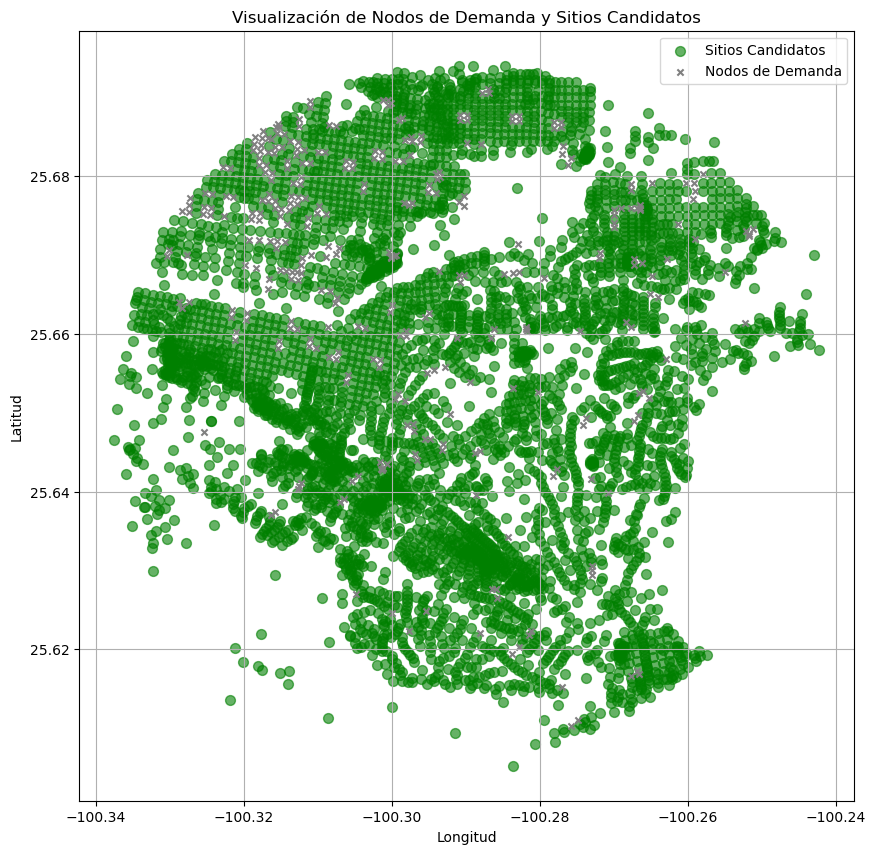

In [46]:
import matplotlib.pyplot as pltb

plt.figure(figsize=(10, 10))

plt.scatter(
    gdf_nodos.loc[gdf_nodos['es_candidato'], 'lon'],
    gdf_nodos.loc[gdf_nodos['es_candidato'], 'lat'],
    c='green',
    label='Sitios Candidatos',
    s=50,
    marker='o',
    alpha=0.6
)

plt.scatter(
    gdf_nodos.loc[~gdf_nodos['es_candidato'], 'lon'],
    gdf_nodos.loc[~gdf_nodos['es_candidato'], 'lat'],
    c='grey',
    label='Nodos de Demanda',
    s=20,
    marker='x'
)

plt.legend()
plt.title("Visualización de Nodos de Demanda y Sitios Candidatos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


In [49]:
gdf_nodos.es_candidato.value_counts()

es_candidato
True     4739
False     335
Name: count, dtype: int64

In [50]:
from shapely.geometry import Point

gdf_nodos = gdf_nodos.reset_index(drop=True)
gdf_nodos['node_id'] = gdf_nodos.index  

dfs_modelo_por_cluster = {}

for cluster_id in gdf_nodos['cluster_manual'].unique():
    sub_nodos = gdf_nodos[gdf_nodos['cluster_manual'] == cluster_id]

    I = sub_nodos[sub_nodos['POBTOT'] > 0].copy()
    J = sub_nodos[sub_nodos['es_candidato']].copy()

    distancias = []

    for i_idx, i_row in I.iterrows():
        for j_idx, j_row in J.iterrows():
            distancia = i_row.geometry.distance(j_row.geometry)

            if distancia <= 500:
                nivel = 1
                cobertura = 1.0
            elif distancia <= 1000:
                nivel = 2
                cobertura = 0.5
            elif distancia <= 1500:
                nivel = 3
                cobertura = 0.25
            else:
                continue

            distancias.append({
                'cluster': cluster_id,
                'i': i_row.node_id,
                'j': j_row.node_id,
                'dist_m': distancia,
                'nivel': nivel,
                'cobertura': cobertura,
                'demanda': i_row.POBTOT
            })

    df_modelo_cluster = pd.DataFrame(distancias)
    dfs_modelo_por_cluster[str(cluster_id)] = df_modelo_cluster


In [53]:
dfs_modelo_por_cluster['4']

cluster     i     j      dist_m  nivel  cobertura  demanda
0          4    33    33    0.000000      1        1.0     32.0
1          4    33   354  156.042910      1        1.0     32.0
2          4    33   481  163.532160      1        1.0     32.0
3          4    33   615  589.790217      2        0.5     32.0
4          4    33   659  326.721484      1        1.0     32.0
..       ...   ...   ...         ...    ...        ...      ...
751        4  4961  3982  641.147332      2        0.5    208.0
752        4  4961  4238  239.621004      1        1.0    208.0
753        4  4961  4487  259.144167      1        1.0    208.0
754        4  4961  4489  611.472654      2        0.5    208.0
755        4  4961  4961    0.000000      1        1.0    208.0

[756 rows x 7 columns]

In [56]:
len(dfs_modelo_por_cluster)

76

In [57]:
import os

output_dir = "modelos_por_cluster"
os.makedirs(output_dir, exist_ok=True)

for cluster_id, df in dfs_modelo_por_cluster.items():
    filename = f"{output_dir}/modelo_cluster_{cluster_id}.csv"
    df.to_csv(filename, index=False)
